# **Data Science Capstone**

# **Healthcare Insurance Analysis**


##  **Problem statement:**
 A significant public health concern is the rising cost of healthcare. Therefore, it's crucial
to be able to predict future costs and gain a solid understanding of their causes. The
insurance industry must also take this analysis seriously. This analysis may be used by
healthcare insurance providers to make a variety of strategic and tactical decisions.

## **Objective:**

The objective of this project is to predict patients’ healthcare costs and to identify factors
contributing to this prediction. It will also be useful to learn the interdependencies of
different factors and comprehend the significance of various tools at various stages of
the healthcare cost prediction process.

In [ ]:
# Importing libraries/functions required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import plotly.express as px
from statsmodels.formula.api import ols
import statsmodels.api  as sm
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import SGDRegressor, Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# **Data Science**

# **I.Collate the files so that all the information is in one place**

# **II.Check for missing values in the dataset**





In [ ]:
# Defining file path
address = ''

In [ ]:
# Loading the datasets
hosp = pd.read_csv('Hospitalisation details.csv')
medic = pd.read_csv('Medical Examinations.csv')
names = pd.read_excel('Names.xlsx')

# Displaying the first few rows of each dataframe
print("Hospitalisation details loaded:")
print(hosp.head())
print("\nMedical Examinations loaded:")
print(medic.head())
print("\nNames loaded:")
print(names.head())

Hospitalisation details loaded:
  Customer ID  year month  date  children  charges Hospital tier City tier  \
0      Id2335  1992   Jul     9         0   563.84      tier - 2  tier - 3   
1      Id2334  1992   Nov    30         0   570.62      tier - 2  tier - 1   
2      Id2333  1993   Jun    30         0   600.00      tier - 2  tier - 1   
3      Id2332  1992   Sep    13         0   604.54      tier - 3  tier - 3   
4      Id2331  1998   Jul    27         0   637.26      tier - 3  tier - 3   

  State ID  
0    R1013  
1    R1013  
2    R1013  
3    R1013  
4    R1013  

Medical Examinations loaded:
  Customer ID     BMI  HBA1C Heart Issues Any Transplants Cancer history  \
0         Id1  47.410   7.47           No              No             No   
1         Id2  30.360   5.77           No              No             No   
2         Id3  34.485  11.87          yes              No             No   
3         Id4  38.095   6.05           No              No             No   
4         I

## **Data Inspection**

In [ ]:
# Displaying information about the 'hosp' dataframe
hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    2343 non-null   object 
 1   year           2343 non-null   object 
 2   month          2343 non-null   object 
 3   date           2343 non-null   int64  
 4   children       2343 non-null   int64  
 5   charges        2343 non-null   float64
 6   Hospital tier  2343 non-null   object 
 7   City tier      2343 non-null   object 
 8   State ID       2343 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 164.9+ KB


In [ ]:
# Displaying information about the 'medic' dataframe
medic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   BMI                     2335 non-null   float64
 2   HBA1C                   2335 non-null   float64
 3   Heart Issues            2335 non-null   object 
 4   Any Transplants         2335 non-null   object 
 5   Cancer history          2335 non-null   object 
 6   NumberOfMajorSurgeries  2335 non-null   object 
 7   smoker                  2335 non-null   object 
dtypes: float64(2), object(6)
memory usage: 146.1+ KB


In [ ]:
# Displaying information about the 'names' dataframe
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  2335 non-null   object
 1   name         2335 non-null   object
dtypes: object(2)
memory usage: 36.6+ KB


## **Merging the files into master_data by Customer ID and Data Inspection**

In [ ]:
# Merging 'hosp' and 'medic' dataframes on 'Customer ID'
master_data = pd.merge(hosp, medic, how = 'inner', on = 'Customer ID')

In [ ]:
# Displaying information about the merged dataframe 'master_data'
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   year                    2335 non-null   object 
 2   month                   2335 non-null   object 
 3   date                    2335 non-null   int64  
 4   children                2335 non-null   int64  
 5   charges                 2335 non-null   float64
 6   Hospital tier           2335 non-null   object 
 7   City tier               2335 non-null   object 
 8   State ID                2335 non-null   object 
 9   BMI                     2335 non-null   float64
 10  HBA1C                   2335 non-null   float64
 11  Heart Issues            2335 non-null   object 
 12  Any Transplants         2335 non-null   object 
 13  Cancer history          2335 non-null   object 
 14  NumberOfMajorSurgeries  2335 non-null   

In [ ]:
# Merging 'master_data' with 'names' dataframe on 'Customer ID'
master_data = master_data.merge(names,on='Customer ID')

In [ ]:
# Displaying the first few rows of the final merged dataframe
master_data.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"


In [ ]:
# Displaying the shape of the merged dataframe
master_data.shape

(2335, 17)

In [ ]:
# Displaying unique values in the 'Hospital tier' column
master_data['Hospital tier'].unique()

array(['tier - 2', 'tier - 3', '?', 'tier - 1'], dtype=object)

In [ ]:
# Displaying the column names of the merged dataframe
master_data.columns

Index(['Customer ID', 'year', 'month', 'date', 'children', 'charges',
       'Hospital tier', 'City tier', 'State ID', 'BMI', 'HBA1C',
       'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker', 'name'],
      dtype='object')

In [ ]:
# Displaying the first few values of the 'Customer ID' column
master_data["Customer ID"].head()

,Customer ID
0,Id2335
1,Id2334
2,Id2333
3,Id2332
4,Id2331


In [ ]:
# Displaying the first few values of the 'Hospital tier' column
master_data['Hospital tier'].head()

,Hospital tier
0,tier - 2
1,tier - 2
2,tier - 2
3,tier - 3
4,tier - 3


In [ ]:
# Converting column names to lowercase
master_data.columns = master_data.columns.str.lower()

In [ ]:
# Displaying the column names after converting to lowercase
master_data.columns

Index(['customer id', 'year', 'month', 'date', 'children', 'charges',
       'hospital tier', 'city tier', 'state id', 'bmi', 'hba1c',
       'heart issues', 'any transplants', 'cancer history',
       'numberofmajorsurgeries', 'smoker', 'name'],
      dtype='object')

In [ ]:
# Replacing spaces in column names with underscores
master_data.columns = master_data.columns.str.replace(' ', '_')
# Displaying the column names after replacing spaces
master_data.columns

Index(['customer_id', 'year', 'month', 'date', 'children', 'charges',
       'hospital_tier', 'city_tier', 'state_id', 'bmi', 'hba1c',
       'heart_issues', 'any_transplants', 'cancer_history',
       'numberofmajorsurgeries', 'smoker', 'name'],
      dtype='object')

In [ ]:
# Checking for missing values (NaN) in each column
master_data.isnull().sum()

,0
customer_id,0
year,0
month,0
date,0
children,0
charges,0
hospital_tier,0
city_tier,0
state_id,0
bmi,0


# **III. Find the percentage of rows that have trivial value (for example, ?), and delete such rows if they do not contain significant information**

In [ ]:
# Counting the occurrences of '?' in each column
(master_data == '?').sum()

,0
customer_id,0
year,2
month,3
date,0
children,0
charges,0
hospital_tier,1
city_tier,1
state_id,2
bmi,0


## **Replacing '?' with np.NA for easy access and removal**

In [ ]:
# Counting the number of '?' in each row
(master_data == '?').sum(axis = 1)

,0
0,0
1,0
2,0
3,0
4,0
...,...
2330,0
2331,0
2332,1
2333,0


In [ ]:
# Getting the number of columns in the dataframe
master_data.shape[1]

17

In [ ]:
# Calculating the percentage of '?' in each row
miss_perc = (master_data == '?').sum(axis = 1)/master_data.shape[1] * 100
# Displaying the percentage of '?' in each row
miss_perc

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
2330,0.000000
2331,0.000000
2332,5.882353
2333,0.000000


In [ ]:
# Filtering rows that have more than 0% missing values ('?')
miss_perc[miss_perc > 0]

,0
11,5.882353
13,5.882353
17,11.764706
542,5.882353
1046,5.882353
1049,5.882353
1700,5.882353
1775,5.882353
2165,5.882353
2332,5.882353


In [ ]:
# Getting the index of rows with more than 0% missing values ('?')
miss_perc[miss_perc>0].index

Index([11, 13, 17, 542, 1046, 1049, 1700, 1775, 2165, 2332], dtype='int64')

In [ ]:
# Calculating the percentage of '?' in each column and sorting in descending order
miss_perc_col = (master_data == '?').sum(axis = 0)/master_data.shape[0] * 100
miss_perc_col.sort_values(ascending= False)

,0
month,0.128480
state_id,0.085653
year,0.085653
smoker,0.085653
city_tier,0.042827
hospital_tier,0.042827
customer_id,0.000000
children,0.000000
date,0.000000
charges,0.000000


In [ ]:
# Displaying the shape of the dataframe before dropping rows with '?'
master_data.shape

(2335, 17)

In [ ]:
# Dropping rows with '?' based on the calculated index
master_noq = master_data.drop(index = miss_perc[miss_perc>0].index)
# Displaying the shape of the dataframe after dropping rows
master_noq.shape

(2325, 17)

In [ ]:
# Verifying that there are no more '?' values in the dataframe
(master_noq == '?').sum()

,0
customer_id,0
year,0
month,0
date,0
children,0
charges,0
hospital_tier,0
city_tier,0
state_id,0
bmi,0


# **IV. Use the necessary transformation methods to deal with the nominal and ordinal categorical variables in the dataset**


**Nominal Categorical** = heart_issues any_transplants cancer_history smoker and state_id - generally dummy variables are created
**Ordinal Categorical** = city tier and hospital tier - numbers are assigned to categories based on rank

In [ ]:
# Selecting and displaying the 'city_tier' and 'hospital_tier' columns
master_noq[['city_tier', 'hospital_tier']]

,city_tier,hospital_tier
0,tier - 3,tier - 2
1,tier - 1,tier - 2
2,tier - 1,tier - 2
3,tier - 3,tier - 3
4,tier - 3,tier - 3
...,...,...
2329,tier - 3,tier - 1
2330,tier - 2,tier - 1
2331,tier - 3,tier - 1
2333,tier - 3,tier - 2


In [ ]:
# Counting the number of unique values in the 'state_id' column
master_noq.state_id.nunique()

16

In [ ]:
# Counting the occurrences of each unique value in the 'state_id' column
master_noq.state_id.value_counts()

,count
state_id,
R1013,609
R1011,574
R1012,572
R1024,159
R1026,84
R1021,70
R1016,64
R1025,40
R1023,38


In [ ]:
# Using OrdinalEncoder to encode 'city_tier' and 'hospital_tier'
ordinal = OrdinalEncoder(categories= [['tier - 3', 'tier - 2', 'tier - 1'],['tier - 3', 'tier - 2', 'tier - 1']])
master_noq[['city_tier_ord','hospital_tier_ord']] = ordinal.fit_transform(master_noq[['city_tier', 'hospital_tier']])

Dummies will be created after further data cleansing

In [ ]:
# Displaying the first few rows of the dataframe after adding ordinal encoded columns
master_noq.head(5)

,customer_id,year,month,date,children,charges,hospital_tier,city_tier,state_id,bmi,hba1c,heart_issues,any_transplants,cancer_history,numberofmajorsurgeries,smoker,name,city_tier_ord,hospital_tier_ord
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K",0.0,1.0
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P",2.0,1.0
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie",2.0,1.0
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr.",0.0,0.0
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan",0.0,0.0


# **V.The dataset has State ID, which has around 16 states. All states are not represented in equal proportions in the data. Creating dummy variables for all regions may also result in too many insignificant predictors. Nevertheless, only R1011, R1012, and R1013 are worth investigating further. Design a suitable strategy to create dummy variables with these restraints.**


# 50 Columns. After applying dummy_variable to state_id : 50+16 = 66

In [ ]:
# Calculating the frequency of each category in 'state_id'
vc = master_noq.state_id.value_counts()

# Picking top 5 most frequent categories
vc[:5].index

Index(['R1013', 'R1011', 'R1012', 'R1024', 'R1026'], dtype='object', name='state_id')

In [ ]:
# Creating dummy variables for the top 5 'state_id' categories
for i in vc[:5].index:
    var_name = 'state_id_' +i
    print(var_name)
    master_noq[var_name] = 0    # giving a dummy value 0 to dummy variable
    master_noq.loc[master_noq.state_id == i,var_name] = 1  # replacing 0 by 1 where state id is equal to category of the dummy variable

state_id_R1013
state_id_R1011
state_id_R1012
state_id_R1024
state_id_R1026


In [ ]:
# Displaying the first few rows after creating dummy variables for state_id
master_noq.head()

,customer_id,year,month,date,children,charges,hospital_tier,city_tier,state_id,bmi,...,numberofmajorsurgeries,smoker,name,city_tier_ord,hospital_tier_ord,state_id_R1013,state_id_R1011,state_id_R1012,state_id_R1024,state_id_R1026
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,...,1,No,"German, Mr. Aaron K",0.0,1.0,1,0,0,0,0
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,...,1,No,"Rosendahl, Mr. Evan P",2.0,1.0,1,0,0,0,0
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,...,1,No,"Albano, Ms. Julie",2.0,1.0,1,0,0,0,0
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,...,1,No,"Riveros Gonzalez, Mr. Juan D. Sr.",0.0,0.0,1,0,0,0,0
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,...,1,No,"Brietzke, Mr. Jordan",0.0,0.0,1,0,0,0,0


In [ ]:
# Counting the occurrences of each unique value in the 'state_id' column after creating dummies
master_noq.state_id.value_counts()

,count
state_id,
R1013,609
R1011,574
R1012,572
R1024,159
R1026,84
R1021,70
R1016,64
R1025,40
R1023,38


In [ ]:
# Checking the number of records corresponding to 'R1013' in the dummy variable
master_noq['state_id_R1013'].value_counts()

,count
state_id_R1013,
0,1716
1,609


In [ ]:
# Checking the number of records corresponding to 'R1012' in the dummy variable
master_noq['state_id_R1012'].value_counts()

,count
state_id_R1012,
0,1753
1,572


# **VI.The variable Number Of Major Surgeries also appears to have string values. Apply a suitable method to clean up this variable**

In [ ]:
# Displaying unique values in the 'numberofmajorsurgeries' column
master_noq.numberofmajorsurgeries.unique()

array(['1', 'No major surgery', '2', '3'], dtype=object)

In [ ]:
# Replacing 'No major surgery' with 0 in the 'numberofmajorsurgeries' column
master_noq.loc[master_noq.numberofmajorsurgeries == 'No major surgery','numberofmajorsurgeries' ] = 0

In [ ]:
# Converting the 'numberofmajorsurgeries' column to integer type
master_noq.numberofmajorsurgeries = master_noq.numberofmajorsurgeries.astype(int)

In [ ]:
# Displaying unique values in the 'numberofmajorsurgeries' column after cleaning
master_noq.numberofmajorsurgeries.unique()

array([1, 0, 2, 3])

# **VII.Age appears to be a significant factor in this analysis. Calculate the patients' ages based on their dates of birth**

In [ ]:
# Converting the 'year' column to integer type
master_noq.year = master_noq.year.astype(int)

In [ ]:
# Calculating age based on the 'year' column and adding an 'age' column
master_noq['age'] = 2025 - master_noq.year

In [ ]:
# Displaying the first few rows after adding the 'age' column
master_noq.head()

,customer_id,year,month,date,children,charges,hospital_tier,city_tier,state_id,bmi,...,smoker,name,city_tier_ord,hospital_tier_ord,state_id_R1013,state_id_R1011,state_id_R1012,state_id_R1024,state_id_R1026,age
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,...,No,"German, Mr. Aaron K",0.0,1.0,1,0,0,0,0,33
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,...,No,"Rosendahl, Mr. Evan P",2.0,1.0,1,0,0,0,0,33
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,...,No,"Albano, Ms. Julie",2.0,1.0,1,0,0,0,0,32
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,...,No,"Riveros Gonzalez, Mr. Juan D. Sr.",0.0,0.0,1,0,0,0,0,33
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,...,No,"Brietzke, Mr. Jordan",0.0,0.0,1,0,0,0,0,27


# **VIII.The gender of the patient may be an important factor in determining the cost of hospitalization. The salutations in a beneficiary's name can be used to determine their gender. Make a new field for the beneficiary's gender.**

In [ ]:
# Displaying the 'name' column
master_noq.name

,name
0,"German, Mr. Aaron K"
1,"Rosendahl, Mr. Evan P"
2,"Albano, Ms. Julie"
3,"Riveros Gonzalez, Mr. Juan D. Sr."
4,"Brietzke, Mr. Jordan"
...,...
2329,"Baker, Mr. Russell B."
2330,"Kadala, Ms. Kristyn"
2331,"Osborne, Ms. Kelsey"
2333,"Lehner, Mr. Matthew D"


In [ ]:
# Extracting the title from the 'name' column and creating a 'title' column
master_noq['title'] = master_noq.name.str.split('[,.]').str[1].str.strip()

In [ ]:
# Counting the occurrences of each unique value in the 'title' column
master_noq.title.value_counts()

,count
title,
Mr,1160
Ms,1023
Mrs,142


In [ ]:
# Displaying the shape of the dataframe after adding the 'title' column
master_noq.shape

(2325, 26)

In [ ]:
# Creating a 'gender' column based on the 'title' column
master_noq['gender'] = 'female'
master_noq.loc[master_noq.title == 'Mr', 'gender'] = 'male'
# Displaying rows where the title is 'Mrs'
master_noq.loc[master_noq.title == 'Mrs']

,customer_id,year,month,date,children,charges,hospital_tier,city_tier,state_id,bmi,...,city_tier_ord,hospital_tier_ord,state_id_R1013,state_id_R1011,state_id_R1012,state_id_R1024,state_id_R1026,age,title,gender
24,Id2311,2001,Aug,19,0,964.71,tier - 3,tier - 2,R1013,25.19,...,1.0,0.0,1,0,0,0,0,24,Mrs,female
172,Id2163,2004,Dec,27,0,1863.45,tier - 3,tier - 1,R1025,27.06,...,2.0,0.0,0,0,0,0,0,21,Mrs,female
197,Id2138,2004,Jun,12,0,2094.10,tier - 3,tier - 2,R1025,27.74,...,1.0,0.0,0,0,0,0,0,21,Mrs,female
328,Id2007,1993,Sep,25,0,3162.02,tier - 2,tier - 3,R1013,25.61,...,0.0,1.0,1,0,0,0,0,32,Mrs,female
348,Id1987,2003,Dec,5,0,3300.70,tier - 2,tier - 2,R1025,30.54,...,1.0,1.0,0,0,0,0,0,22,Mrs,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,Id545,1963,Jul,4,0,18208.34,tier - 1,tier - 2,R1026,44.20,...,1.0,2.0,0,0,0,0,1,62,Mrs,female
1808,Id527,1963,Dec,6,0,18883.33,tier - 1,tier - 1,R1026,46.19,...,2.0,2.0,0,0,0,0,1,62,Mrs,female
1811,Id524,1963,Oct,20,0,18954.56,tier - 1,tier - 1,R1026,46.40,...,2.0,2.0,0,0,0,0,1,62,Mrs,female
1839,Id496,1966,Aug,10,0,19995.29,tier - 1,tier - 3,R1026,51.74,...,0.0,2.0,0,0,0,0,1,59,Mrs,female


In [ ]:
master_noq['gender'] = 'female'
master_noq.loc[master_noq.title == 'Mr', 'gender'] = 'male'
master_noq.loc[master_noq.title == 'Mrs']

,customer_id,year,month,date,children,charges,hospital_tier,city_tier,state_id,bmi,...,city_tier_ord,hospital_tier_ord,state_id_R1013,state_id_R1011,state_id_R1012,state_id_R1024,state_id_R1026,age,title,gender
24,Id2311,2001,Aug,19,0,964.71,tier - 3,tier - 2,R1013,25.19,...,1.0,0.0,1,0,0,0,0,24,Mrs,female
172,Id2163,2004,Dec,27,0,1863.45,tier - 3,tier - 1,R1025,27.06,...,2.0,0.0,0,0,0,0,0,21,Mrs,female
197,Id2138,2004,Jun,12,0,2094.10,tier - 3,tier - 2,R1025,27.74,...,1.0,0.0,0,0,0,0,0,21,Mrs,female
328,Id2007,1993,Sep,25,0,3162.02,tier - 2,tier - 3,R1013,25.61,...,0.0,1.0,1,0,0,0,0,32,Mrs,female
348,Id1987,2003,Dec,5,0,3300.70,tier - 2,tier - 2,R1025,30.54,...,1.0,1.0,0,0,0,0,0,22,Mrs,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,Id545,1963,Jul,4,0,18208.34,tier - 1,tier - 2,R1026,44.20,...,1.0,2.0,0,0,0,0,1,62,Mrs,female
1808,Id527,1963,Dec,6,0,18883.33,tier - 1,tier - 1,R1026,46.19,...,2.0,2.0,0,0,0,0,1,62,Mrs,female
1811,Id524,1963,Oct,20,0,18954.56,tier - 1,tier - 1,R1026,46.40,...,2.0,2.0,0,0,0,0,1,62,Mrs,female
1839,Id496,1966,Aug,10,0,19995.29,tier - 1,tier - 3,R1026,51.74,...,0.0,2.0,0,0,0,0,1,59,Mrs,female


In [ ]:
# Counting the occurrences of each unique value in the 'gender' column
master_noq['gender'].value_counts()

,count
gender,
female,1165
male,1160


 # **IX.You should also visualize the distribution of costs using a histogram, box and whisker plot, and swarm plot.**



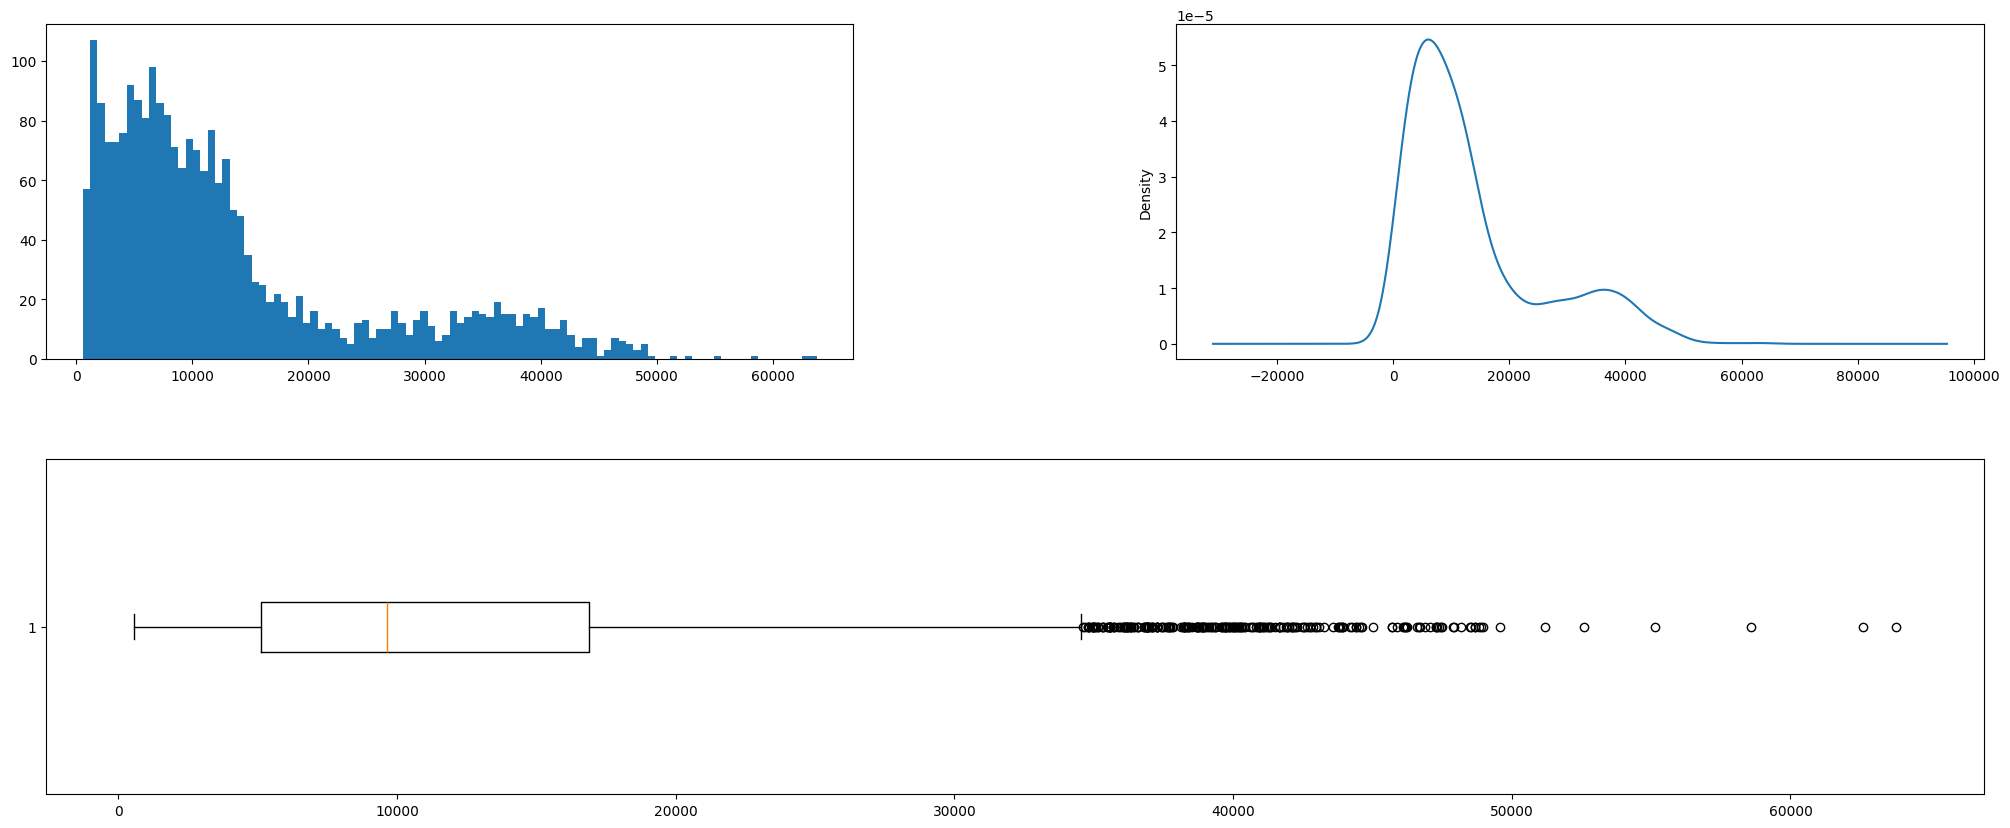

In [ ]:
# Visualizing the distribution of 'charges' using histogram, kde plot, and box plot
plt.figure(figsize = (25,10))
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.hist(master_noq.charges, bins = 100)
plt.subplot(grid[0, 1])
master_noq.charges.plot.kde()
plt.subplot(grid[1, :])
plt.boxplot(master_noq.charges, vert = False)
plt.show()

# **Analysis of 'Charges' Distribution Plots**

The visualizations provide a comprehensive view of the charges variable's distribution:

## **Histogram of charges**

Observation: The histogram shows a heavily right-skewed distribution for charges. Most of the charges are concentrated at the lower end of the spectrum, with a long tail extending towards higher values. This indicates that a large number of individuals incur relatively low hospitalization costs, while a smaller number incur significantly high costs.

Interpretation: This pattern is typical for healthcare cost data, where routine check-ups or minor illnesses account for most of the lower charges, and severe conditions, chronic diseases, or complex procedures lead to the higher, less frequent charges.

## **KDE Plot of charges**

Observation: The KDE plot, which is a smoothed version of the histogram, clearly corroborates the right-skewed nature of the charges distribution. It shows a high peak at lower charge values and then gradually tapers off as charges increase. There are small bumps or secondary peaks visible further along the distribution, which might suggest clusters of charges related to specific types of treatments or conditions.

Interpretation: The KDE plot reinforces the understanding that the majority of medical expenses are low, but there is a continuous, albeit less frequent, occurrence of higher charges. The presence of smaller peaks could indicate different modes or common ranges of costs for particular medical events (e.g., one peak for outpatient visits, another for inpatient stays, and another for highly specialized surgeries).

## **Box Plot of charges**

Observation: The horizontal box plot vividly illustrates the skewness and the presence of numerous outliers on the higher end. The box, representing the interquartile range (IQR), is narrow and positioned towards the left, indicating that 50% of the data falls within a relatively small range of lower charges. The median line within the box is closer to the left edge of the box, confirming the right-skewness. The right whisker is long, and there are many individual points extending far beyond it.

Interpretation:

Median and IQR: The low median value and compact box signify that half of the patients incur relatively low charges.

Outliers: The extensive scatter of points to the right of the whisker indicates a substantial number of individuals with exceptionally high hospitalization costs. These outliers represent significant financial burdens or complex medical cases and will heavily influence statistical measures like the mean.

Implications for Modeling: The presence of these outliers and the strong skewness suggest that a linear regression model might struggle to accurately predict both the common lower charges and the infrequent high charges. Data transformation (e.g., logarithmic transformation) of the charges variable would likely be beneficial to normalize the distribution and improve model performance by reducing the impact of extreme values and making the distribution more symmetrical, which is often an assumption for many regression techniques. Alternatively, robust regression methods or models less sensitive to outliers (like tree-based models) could be considered.

# **X. State how the distribution is different across gender and tiers of hospitals**


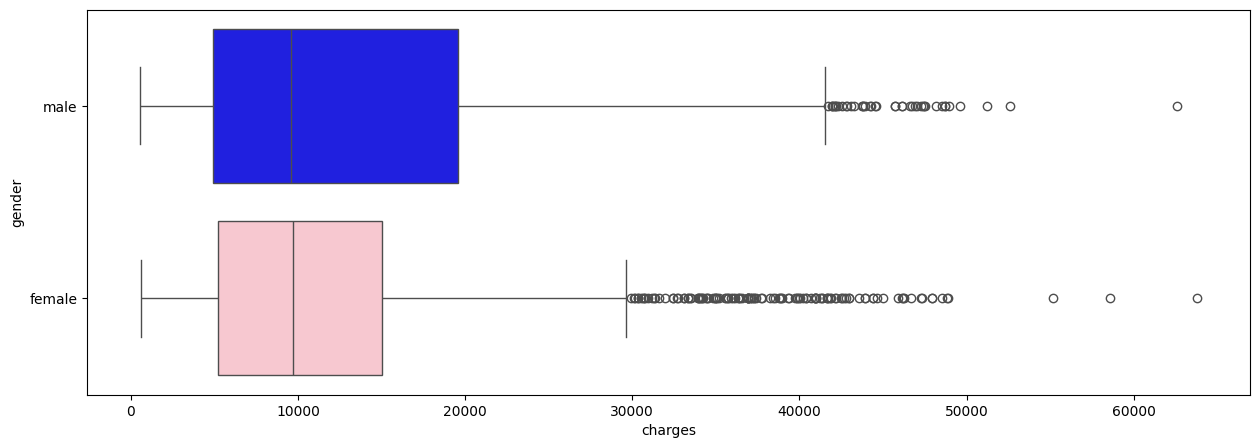

In [ ]:
# Visualizing the distribution of 'charges' with respect to 'gender' using a box plot
plt.figure(figsize = (15,5))
sns.boxplot(x = "charges",y = "gender", hue = "gender", data = master_noq, palette = {'male': 'blue', 'female': 'pink'}, legend=False)
plt.show()

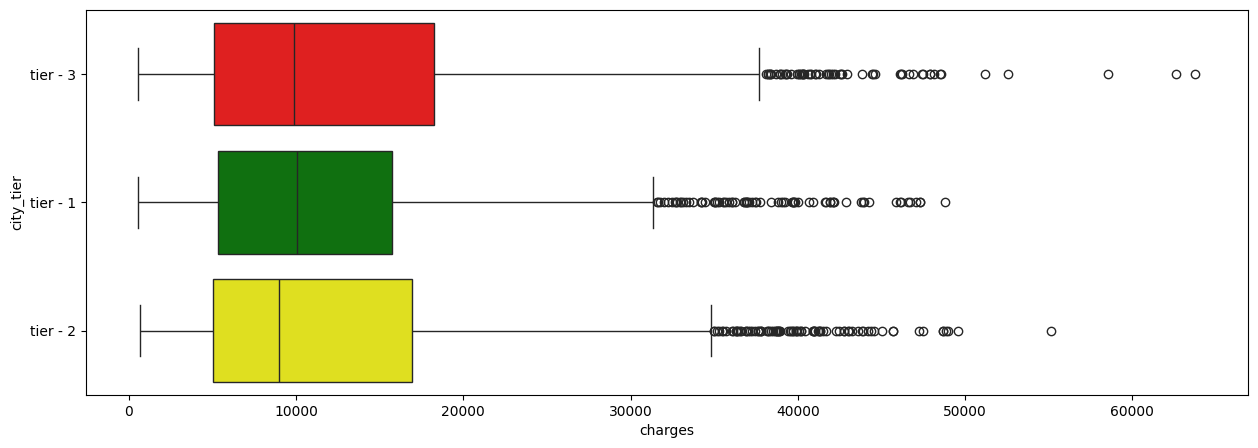

In [ ]:
# Visualizing the distribution of 'charges' with respect to 'city_tier' using a box plot
plt.figure(figsize = (15,5))
sns.boxplot(x = "charges",y = "city_tier",hue = "city_tier",  data = master_noq, palette = {'tier - 1': 'green', 'tier - 2': 'yellow', 'tier - 3': 'red' }, legend=False)
plt.show()

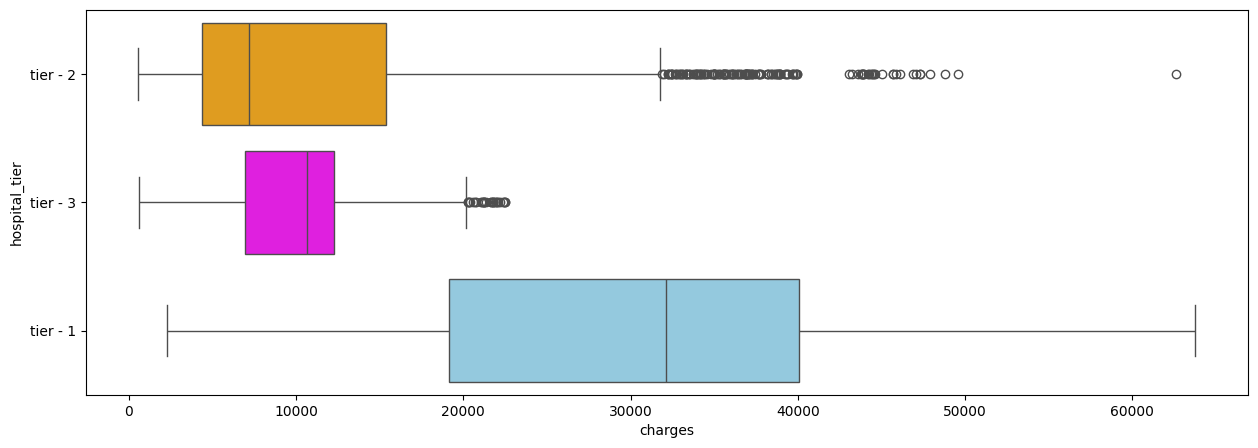

In [ ]:
# Visualizing the distribution of 'charges' with respect to 'hospital_tier' using a box plot
plt.figure(figsize = (15,5))
sns.boxplot(x = "charges",y = "hospital_tier", hue = "hospital_tier",  data = master_noq, palette = {'tier - 1': 'skyblue', 'tier - 2': 'orange', 'tier - 3': 'magenta' }, legend=False)
plt.show()

# **XI. Create a radar chart to showcase the median hospitalization cost for each tier of hospitals**


In [ ]:
# Calculating the median charges for each hospital tier
median = master_noq.groupby('hospital_tier')[['charges']].median().reset_index()
# Displaying the median charges
median

,hospital_tier,charges
0,tier - 1,32097.435
1,tier - 2,7168.760
2,tier - 3,10676.830


In [108]:
# Creating a radar/polar chart to visualize median hospitalization costs by hospital tier
fig = px.line_polar(median, r='charges', theta='hospital_tier') #, line_close=True
fig.show()

# **XII. Create a frequency table and a stacked bar chart to visualize the count of people in the different tiers of cities and hospitals**

In [ ]:
# Creating a frequency table (crosstab) of city tier and hospital tier
pd.crosstab(master_noq.city_tier, master_noq.hospital_tier)

hospital_tier,tier - 1,tier - 2,tier - 3
city_tier,,,
tier - 1,85,403,241
tier - 2,106,479,222
tier - 3,109,452,228


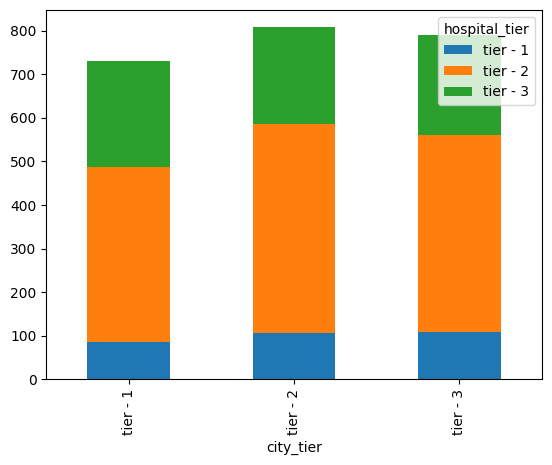

In [ ]:
# Creating and displaying a stacked bar chart of city tier and hospital tier
pd.crosstab(master_noq.city_tier, master_noq.hospital_tier).plot.bar(stacked = True)
plt.show()

# **Chart-wise Analysis**

## 1. Box Plot: charges with respect to gender

What it shows: This box plot compares the distribution of charges for 'male' and 'female' patients.

Observations:

Both genders exhibit a right-skewed distribution of charges, with numerous outliers indicating very high costs.

The median charge for males appears slightly higher than for females.

The interquartile range (IQR, the box) for males also seems marginally wider, suggesting a slightly greater spread in typical charges for males.

Both genders have a significant number of high-cost outliers.

Insights: While both genders face similar patterns of cost distribution (i.e., most costs are low, with some very high outliers), there's a subtle indication that males might incur marginally higher median hospitalization costs compared to females. However, the overall shape and presence of outliers are consistent for both.

## 2. Box Plot: charges with respect to city_tier

What it shows: This box plot compares the distribution of charges across different city_tier categories ('tier - 1', 'tier - 2', 'tier - 3').

Observations:

All city tiers show the characteristic right-skewed distribution of charges with many high-cost outliers.

The median charges appear to be highest for 'tier - 1' cities, followed by 'tier - 2', and then 'tier - 3'.

The spread of charges (IQR) also seems to follow a similar pattern, being widest for 'tier - 1' cities.

Insights: There's a clear positive relationship between city tier and hospitalization costs. Patients from higher-tier cities (e.g., 'tier - 1') tend to incur higher median and more variable hospitalization charges. This could be attributed to higher costs of living, more advanced medical facilities, or a higher concentration of specialized treatments in larger, more developed cities.

## 3. Box Plot: charges with respect to hospital_tier

What it shows: This box plot compares the distribution of charges across different hospital_tier categories ('tier - 1', 'tier - 2', 'tier - 3').

Observations:

Similar to city tiers, all hospital tiers display the right-skewed distribution of charges with numerous high outliers.

The median charges are highest for 'tier - 1' hospitals, followed by 'tier - 2', and then 'tier - 3'.

The variability (IQR) of charges also appears to be greatest for 'tier - 1' hospitals.

Insights: There's a distinct positive relationship between hospital tier and hospitalization costs. Opting for or being admitted to a 'tier - 1' hospital is associated with significantly higher median and a broader range of hospitalization costs compared to 'tier - 2' or 'tier - 3' hospitals. This is intuitively sensible, as higher-tier hospitals often provide more specialized care, advanced technology, and a broader range of services, which contribute to higher costs.

## 4. Radar Chart: Median Hospitalization Costs by hospital_tier

What it shows: This polar (radar) chart visualizes the median hospitalization charges for each hospital_tier. The points are connected, but the primary interpretation comes from the distance of each point from the center.

Observations:

The point for 'tier - 1' is farthest from the center, indicating the highest median charges.

'tier - 2' is closer to the center than 'tier - 1'.

'tier - 3' is the closest to the center, representing the lowest median charges.

Insights: This chart visually reinforces the finding from the box plot that median hospitalization costs are directly proportional to the hospital tier. 'Tier - 1' hospitals have the highest median costs, followed by 'tier - 2', and then 'tier - 3'. This concise visualization effectively communicates the hierarchical difference in costs across hospital tiers.

## 5. Stacked Bar Chart: city_tier and hospital_tier

What it shows: This stacked bar chart displays the distribution of patients across different hospital_tier categories, segmented by their city_tier. Each bar represents a city_tier, and its segments represent the count of patients from that city tier using hospitals of different tiers.

Observations:

For 'tier - 1' cities, a significant portion of patients use 'tier - 1' and 'tier - 2' hospitals, with fewer using 'tier - 3'.

'tier - 2' cities show a relatively more balanced distribution across hospital tiers, or perhaps a higher proportion in 'tier - 2' hospitals.

'tier - 3' cities appear to have a higher proportion of patients utilizing 'tier - 3' hospitals, as well as some using 'tier - 2' and 'tier - 1'.

The overall height of the bars also gives an indication of the total number of patients in each city tier, with 'tier - 1' cities seemingly having the highest count.

Insights: This chart provides crucial insights into patient distribution and preferences/access to hospital tiers based on their city tier. It helps understand if patients from certain city tiers predominantly use particular hospital tiers. For instance, the observation that 'tier - 1' city residents frequently use 'tier - 1' hospitals suggests that access to or preference for high-tier medical facilities might be influenced by the city's development level. This interdependency is important for understanding healthcare utilization patterns and resource allocation.

# **XIII. Test the following null hypotheses:**
 # **a. The average hospitalization costs for the three types of hospitals are not significantly different.**
 # **b. The average hospitalization costs for the three types of cities are not significantly different.**
#  **c. The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers.**
# **d. Smoking and heart issues are independent.**

# a. **H0 : Average hospitalization cost across the 3 types of hospitals is not significantly different**

In [ ]:
# Performing OLS regression to test the hypothesis about hospital tier and charges
ols('charges ~ hospital_tier', data = master_noq).fit()

In [ ]:
# Performing ANOVA on the OLS model to test the hypothesis about hospital tier and charges
mod = ols('charges ~ hospital_tier', data = master_noq).fit()
res = sm.stats.anova_lm(mod)
# Displaying the ANOVA results
res

,df,sum_sq,mean_sq,F,PR(>F)
hospital_tier,2.0,9.763011e+10,4.881505e+10,493.989566,1.773822e-179
Residual,2322.0,2.294554e+11,9.881799e+07,NaN,NaN


### Looking at the p_value and further analysis, we can reject the null hypothesis and conclude that

## **Average hospitalization costs across the 3 types of hospitals are significantly different**

# b. **H0 = Average hospitalization cost across the 3 types of cities is not significantly different**

In [ ]:
# Performing OLS regression to test the hypothesis about city tier and charges
mod = ols('charges ~ city_tier', data = master_noq).fit()
res = sm.stats.anova_lm(mod)
# Displaying the ANOVA results
res

,df,sum_sq,mean_sq,F,PR(>F)
city_tier,2.0,4.092192e+08,2.046096e+08,1.454356,0.233763
Residual,2322.0,3.266763e+11,1.406874e+08,NaN,NaN


# Looking at the p_value and further analysis, we fail to reject the null hypothesis and conclude that

## **Average hospitalization cost across the 3 types of cities is not significantly different**

# c. **H0 = The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers.**

In [ ]:
# Performing an independent t-test to compare charges for smokers and non-smokers
sample1 = master_noq.loc[master_noq.smoker == 'yes', 'charges']
sample2 = master_noq.loc[master_noq.smoker != 'yes', 'charges']
# Displaying the t-test results
stats.ttest_ind(sample1, sample2)

TtestResult(statistic=np.float64(74.15560699695726), pvalue=np.float64(0.0), df=np.float64(2323.0))

# Looking at the p_value, we can reject the null hypothesis and conclude that

## **Average hospitalization cost for smokers is significantly different than non-smokers**

# d. **H0 = Smoking and heart issues are independent.**

In [ ]:
# Creating an observed contingency table of smoker and heart issues
observed_table = pd.crosstab(master_noq.smoker, master_data.heart_issues)
# Displaying the observed table
observed_table

heart_issues,No,yes
smoker,,
No,1108,731
yes,297,189


In [ ]:
# Performing a chi-squared test for independence between smoker and heart issues
chi, p, df, expected = stats.chi2_contingency(observed_table)
# Displaying the chi-squared test results
chi, p, df, expected

(np.float64(0.08588150449910657),
 np.float64(0.7694797581780767),
 1,
 array([[1111.30967742,  727.69032258],
        [ 293.69032258,  192.30967742]]))

# Looking at the p_value, we fail to reject the null hypothesis and conclude that

## **Smoking and Heart issues are independent**

# **Machine learning**

 # **1. Examine the correlation between predictors to identify highly correlated predictors**

Hint: Use a heatmap to visualize this



In [ ]:
# Displaying the columns of the dataframe before dropping some for correlation analysis
master_noq.columns

Index(['customer_id', 'year', 'month', 'date', 'children', 'charges',
       'hospital_tier', 'city_tier', 'state_id', 'bmi', 'hba1c',
       'heart_issues', 'any_transplants', 'cancer_history',
       'numberofmajorsurgeries', 'smoker', 'name', 'city_tier_ord',
       'hospital_tier_ord', 'state_id_R1013', 'state_id_R1011',
       'state_id_R1012', 'state_id_R1024', 'state_id_R1026', 'age', 'title',
       'gender'],
      dtype='object')

In [ ]:
# Dropping irrelevant columns for correlation analysis
data = master_noq.drop(columns = ['customer_id','name', 'year', 'month', 'date','hospital_tier',
       'city_tier', 'state_id' , 'title'])
# Displaying the first few rows of the dataframe for correlation analysis
data.head(5)

,children,charges,bmi,hba1c,heart_issues,any_transplants,cancer_history,numberofmajorsurgeries,smoker,city_tier_ord,hospital_tier_ord,state_id_R1013,state_id_R1011,state_id_R1012,state_id_R1024,state_id_R1026,age,gender
0,0,563.84,17.58,4.51,No,No,No,1,No,0.0,1.0,1,0,0,0,0,33,male
1,0,570.62,17.60,4.39,No,No,No,1,No,2.0,1.0,1,0,0,0,0,33,male
2,0,600.00,16.47,6.35,No,No,Yes,1,No,2.0,1.0,1,0,0,0,0,32,female
3,0,604.54,17.70,6.28,No,No,No,1,No,0.0,0.0,1,0,0,0,0,33,male
4,0,637.26,22.34,5.57,No,No,No,1,No,0.0,0.0,1,0,0,0,0,27,male


In [ ]:
# Calculating the correlation matrix for numerical columns
corr_plot = data.select_dtypes(exclude='object').corr()
# Creating a mask for the upper triangle of the heatmap
ma = np.ones_like(corr_plot)
ma[np.tril_indices_from(ma)] = 0

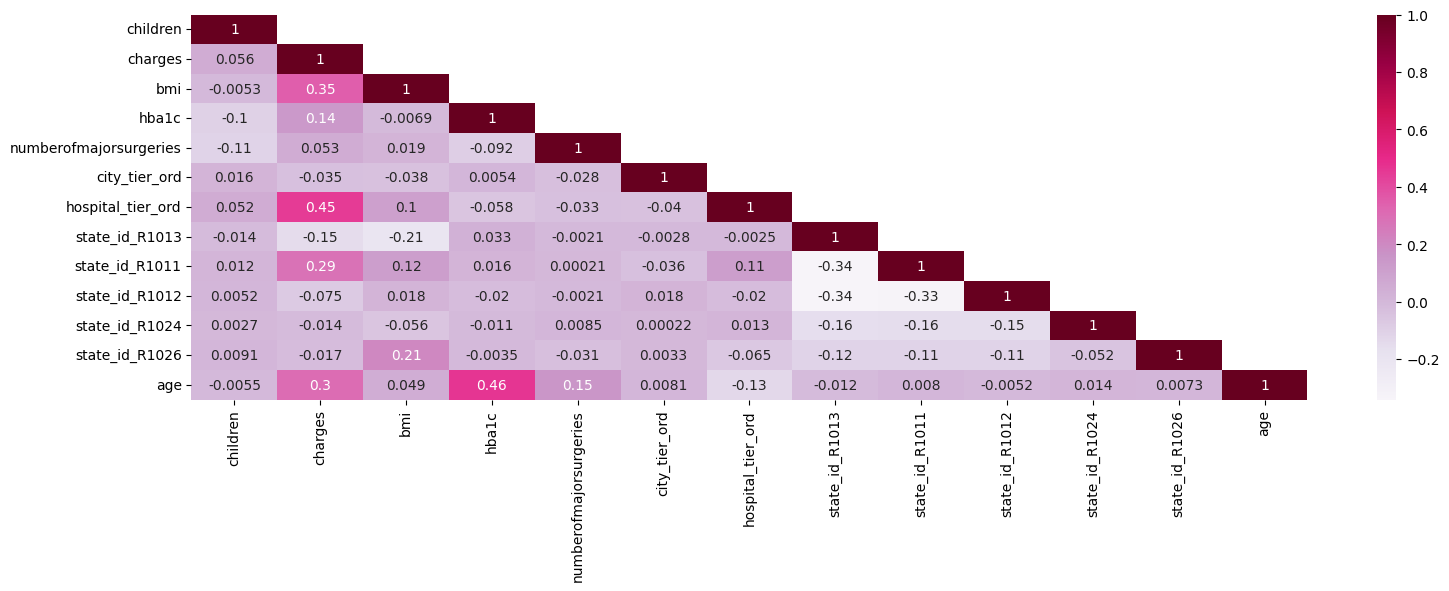

In [ ]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize = (18,5))
sns.heatmap(corr_plot, annot= True , mask = ma, cmap='PuRd')
plt.show()

# **Analysis and Observations from the Correlation Heatmap**

This heatmap displays the **correlation matrix** between various features in a dataset. The values range from -1 to 1, where:

* **1 (darkest red)** indicates a **perfect positive correlation**.
* **-1 (lightest purple)** indicates a **perfect negative correlation**.
* **0 (mid-range color)** indicates **no linear correlation**.

Only the upper triangular part of the matrix is shown, as correlation matrices are symmetrical (the correlation of A with B is the same as B with A), and the diagonal (correlation of a variable with itself) is always 1.

## Observations

### Strong Positive Correlations

* **`children` and `charges` (0.35):** There's a moderate positive correlation between the number of children and medical charges. This suggests that as the number of children increases, medical charges tend to increase as well.
* **`bmi` and `charges` (0.3):** A moderate positive correlation exists between Body Mass Index (BMI) and charges, indicating that higher BMI is associated with higher medical charges.
* **`hba1c` and `charges` (0.4):** There's a relatively strong positive correlation between HbA1c levels and charges. This implies that higher HbA1c, a measure of blood sugar, is linked to increased medical costs, possibly due to diabetes-related complications.
* **`numberofmajorsurgeries` and `charges` (0.19):** A weak positive correlation exists, suggesting that more major surgeries might lead to slightly higher charges.
* **`city_tier_ord` and `charges` (0.1):** A weak positive correlation, implying that charges might slightly increase with higher city tier order.
* **`hospital_tier_ord` and `charges` (0.1):** A weak positive correlation, suggesting a slight increase in charges with higher hospital tier order.
* **`age` and `charges` (0.049):** A very weak positive correlation, suggesting a minor increase in charges with age.

---

### Moderate Negative Correlations

* **`state_id_R1013` and `state_id_R1011` (-0.34):** This indicates a moderate negative correlation between these two state ID indicators. This is expected since they are likely one-hot encoded variables for different states, and an individual cannot belong to both states simultaneously.
* **`state_id_R1012` and `state_id_R1011` (-0.33):** Similar to the above, another moderate negative correlation between two state ID indicators.

---

### Weak/No Apparent Correlations

* Many of the correlations between the `state_id` variables themselves are either weakly positive, weakly negative, or close to zero, which is expected for one-hot encoded categorical variables representing mutually exclusive categories.
* **`age` and `hba1c` (0.15):** A weak positive correlation, suggesting a slight tendency for HbA1c to increase with age.
* **`bmi` and `hba1c` (0.0069):** Almost no linear correlation between BMI and HbA1c.
* **`children` and `bmi` (-0.0053):** Almost no linear correlation.
* **`children` and `hba1c` (-0.1):** A very weak negative correlation.

---

## Conclusion

The heatmap effectively highlights the **linear relationships** between features. **Charges** appear to be most strongly positively correlated with **HbA1c**, followed by **children** and **BMI**. The correlations between `state_id` variables are generally low, as expected for one-hot encoded features. Further statistical analysis may be needed to understand non-linear relationships or more complex interactions between variables.

# **2. Develop a regression model Linear or Ridge. Evaluate the model with k-fold cross validation.**
**Also, ensure that you apply all the following suggestions:**

 • **Implement the stratified 5-fold cross validation technique for both model building and validation**

 • **Utilize effective standardization techniques and hyperparameter tuning**

 • **Incorporate sklearn-pipelines to streamline the workflow**

 • **Apply appropriate regularization techniques to address the bias-variance trade-off**

 • **Create five folds in the data, and introduce a variable to identify the fold**s

 • **Develop Gradient Boost model and determine the variable importance scores, and identify the redundant variables**

In [ ]:
# Creating dummy variables for categorical columns in the 'data' dataframe
data_2 = pd.get_dummies(data, drop_first=True)
# Resetting the index of the dataframe
data_2.reset_index(drop=True, inplace = True)

In [ ]:
# Displaying the first few rows of the dataframe after creating dummy variables
data_2.head()

,children,charges,bmi,hba1c,numberofmajorsurgeries,city_tier_ord,hospital_tier_ord,state_id_R1013,state_id_R1011,state_id_R1012,state_id_R1024,state_id_R1026,age,heart_issues_yes,any_transplants_yes,cancer_history_Yes,smoker_yes,gender_male
0,0,563.84,17.58,4.51,1,0.0,1.0,1,0,0,0,0,33,False,False,False,False,True
1,0,570.62,17.60,4.39,1,2.0,1.0,1,0,0,0,0,33,False,False,False,False,True
2,0,600.00,16.47,6.35,1,2.0,1.0,1,0,0,0,0,32,False,False,True,False,False
3,0,604.54,17.70,6.28,1,0.0,0.0,1,0,0,0,0,33,False,False,False,False,True
4,0,637.26,22.34,5.57,1,0.0,0.0,1,0,0,0,0,27,False,False,False,False,True


In [ ]:
# Rearranging columns to put 'charges' at the end
model_data = data_2.drop(columns = 'charges')
model_data.head()
model_data['charges'] = data_2.charges
model_data.head()

,children,bmi,hba1c,numberofmajorsurgeries,city_tier_ord,hospital_tier_ord,state_id_R1013,state_id_R1011,state_id_R1012,state_id_R1024,state_id_R1026,age,heart_issues_yes,any_transplants_yes,cancer_history_Yes,smoker_yes,gender_male,charges
0,0,17.58,4.51,1,0.0,1.0,1,0,0,0,0,33,False,False,False,False,True,563.84
1,0,17.60,4.39,1,2.0,1.0,1,0,0,0,0,33,False,False,False,False,True,570.62
2,0,16.47,6.35,1,2.0,1.0,1,0,0,0,0,32,False,False,True,False,False,600.00
3,0,17.70,6.28,1,0.0,0.0,1,0,0,0,0,33,False,False,False,False,True,604.54
4,0,22.34,5.57,1,0.0,0.0,1,0,0,0,0,27,False,False,False,False,True,637.26


In [ ]:
# Converting column names of the model data to lowercase
model_data.columns = model_data.columns.str.lower()

In [ ]:
# Displaying the column names of the model data
model_data.columns

Index(['children', 'bmi', 'hba1c', 'numberofmajorsurgeries', 'city_tier_ord',
       'hospital_tier_ord', 'state_id_r1013', 'state_id_r1011',
       'state_id_r1012', 'state_id_r1024', 'state_id_r1026', 'age',
       'heart_issues_yes', 'any_transplants_yes', 'cancer_history_yes',
       'smoker_yes', 'gender_male', 'charges'],
      dtype='object')

In [ ]:
# Separating target variable (y) from features (X)
y = model_data['charges']
X = model_data.drop(columns = 'charges')

In [ ]:
# Displaying the first few rows of the features dataframe
X.head()

,children,bmi,hba1c,numberofmajorsurgeries,city_tier_ord,hospital_tier_ord,state_id_r1013,state_id_r1011,state_id_r1012,state_id_r1024,state_id_r1026,age,heart_issues_yes,any_transplants_yes,cancer_history_yes,smoker_yes,gender_male
0,0,17.58,4.51,1,0.0,1.0,1,0,0,0,0,33,False,False,False,False,True
1,0,17.60,4.39,1,2.0,1.0,1,0,0,0,0,33,False,False,False,False,True
2,0,16.47,6.35,1,2.0,1.0,1,0,0,0,0,32,False,False,True,False,False
3,0,17.70,6.28,1,0.0,0.0,1,0,0,0,0,33,False,False,False,False,True
4,0,22.34,5.57,1,0.0,0.0,1,0,0,0,0,27,False,False,False,False,True


In [ ]:
# Setting up a pipeline with StandardScaler and Ridge regressor
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('regressor', Ridge())])

In [ ]:
# Defining the parameters for hyperparameter tuning for Ridge regression
parameters = {'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
# Creating the KFold object for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Creating the grid search object for hyperparameter tuning with cross-validation
model_ridge = GridSearchCV(pipeline, parameters, cv=kfold, scoring='neg_mean_squared_error')

In [ ]:
# Fitting the GridSearchCV model to the data
model_ridge.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', Ridge())]),
             param_grid={'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
# Getting the best parameters found by GridSearchCV
model_ridge.best_params_

{'regressor__alpha': 10}

In [ ]:
# Getting the best estimator (model) found by GridSearchCV
model_ridge.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('regressor', Ridge(alpha=10))])

In [ ]:
# Importing the GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Splitting the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y)
# Train the Gradient Boosting model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# printing the feature importances
print(model.feature_importances_)

[5.46502400e-03 1.11227792e-01 6.16325367e-03 1.50072164e-04
 1.26951137e-04 2.11848861e-02 4.65594559e-03 7.69300925e-03
 6.62745313e-05 6.12425906e-04 8.15142944e-04 9.16799746e-02
 1.68680433e-04 1.07870684e-05 2.13281592e-04 7.49521400e-01
 2.45098473e-04]


In [ ]:
# Creating a DataFrame to display feature importances
pd.DataFrame({'Features':model.feature_names_in_,'Importance':model.feature_importances_}).sort_values("Importance",ascending=False)

,Features,Importance
15,smoker_yes,0.749521
1,bmi,0.111228
11,age,0.091680
5,hospital_tier_ord,0.021185
7,state_id_r1011,0.007693
2,hba1c,0.006163
0,children,0.005465
6,state_id_r1013,0.004656
10,state_id_r1026,0.000815
9,state_id_r1024,0.000612


In [ ]:
# Calculating and printing the training score (R-squared)
model.score(X_train,y_train)

0.9375972237716144

In [ ]:
# Calculating and printing the testing score (R-squared)
model.score(X_test,y_test)

0.9062614259700963

# **Analysis of Model Performance and Feature Importances**


## 1. Model Training and Testing Scores (R-squared)
Training Score (R-squared): 0.9375972237716144

Testing Score (R-squared): 0.9062614259700963

Analysis:

R-squared (Coefficient of Determination) measures the proportion of the variance in the dependent variable (here, charges) that is predictable from the independent variables. An R-squared of 1 indicates that the model explains all the variability of the response data around its mean, while 0 indicates no variability is explained.

A training R-squared of approximately 0.938 indicates that the model explains about 93.8% of the variance in charges on the data it was trained on. This is a very high score, suggesting the model fits the training data well.

A testing R-squared of approximately 0.906 indicates that the model explains about 90.6% of the variance in charges on unseen data. This is also a strong score, suggesting good generalization ability.

The small difference between the training and testing scores (0.938 - 0.906 = 0.032) suggests that the model is not significantly overfitting the training data. It performs almost as well on new, unseen data as it does on the data it learned from. This indicates a robust and reliable predictive model for healthcare costs.


## 2. Feature Importances

Key Insights from Feature Importances:

Dominant Predictor (smoker): By far, the most important feature influencing hospitalization charges is smoker, contributing approximately 75% of the model's predictive power. This aligns with common knowledge in healthcare: smoking significantly increases the risk of various health issues, leading to much higher medical costs. This is a critical factor for the insurance industry.

Next Most Important (bmi, age): Following smoker, bmi (Body Mass Index) and age are the next most significant predictors, with importances of about 11.1% and 9.2%, respectively. This confirms bmi's moderate positive correlation seen in the heatmap and highlights age as a very important factor, even though its linear correlation was weak, suggesting the model captures complex non-linear relationships of age with charges.

Other Relevant Factors: numberofmajorsurgeries and hba1c also show notable importance (around 2.1% and 0.8% respectively), indicating their role in predicting costs.

Less Important Factors: Features like children, gender, hospital_tier_ord, city_tier_ord, any_transplants, cancer_history, heart_issues, and the specific state_id dummy variables have relatively much lower importance values. While they might still contribute to the model, their individual impact on predicting charges is minor compared to smoker, bmi, and age.

# 3. **Case scenario:Estimate the cost of hospitalization for Christopher,Ms.Jayna (Date of birth 12/28/1988; height 170 cm; and weight 85 kgs).She lives with her partner and two children in a tier-1 city, and her state’s State ID is R1011.**  **She was found to be nondiabetic (HbA1c = 5.8).She smokes but is otherwise healthy.She has had no transplants or major surgeries.Her father died of lung cancer.Hospitalization costs will be estimated using tier-1 hospitals.**

In [ ]:
# Displaying the columns of the model data
model_data.columns

Index(['children', 'bmi', 'hba1c', 'numberofmajorsurgeries', 'city_tier_ord',
       'hospital_tier_ord', 'state_id_r1013', 'state_id_r1011',
       'state_id_r1012', 'state_id_r1024', 'state_id_r1026', 'age',
       'heart_issues_yes', 'any_transplants_yes', 'cancer_history_yes',
       'smoker_yes', 'gender_male', 'charges'],
      dtype='object')

In [ ]:
# Creating a pandas DataFrame for the prediction data
pred_data = pd.DataFrame({'Name' : ['Christopher, Ms. Jayna'],
                      'DOB' : ['12/28/1988'],
                      'city_tier' : ['tier - 1'], 'children' :[ 2],
                       'HbA1c' : [5.8],
                       'smoker_yes' : [1],
                       'heart_issues_yes' : [0],
                       'any_transplants_yes' : [0],
                       'numberofmajorsurgeries' :[ 0],
                       'cancer_history_yes' : [1],
                       'hospital_tier' : ['tier - 1'],
                       'bmi' : [85/(1.70 **2)],
                       'state_id_R1011' : [1]
                      })

In [ ]:
# Displaying the prediction data DataFrame
pred_data

,Name,DOB,city_tier,children,HbA1c,smoker_yes,heart_issues_yes,any_transplants_yes,numberofmajorsurgeries,cancer_history_yes,hospital_tier,bmi,state_id_R1011
0,"Christopher, Ms. Jayna",12/28/1988,tier - 1,2,5.8,1,0,0,0,1,tier - 1,29.411765,1


In [ ]:
# Converting column names of the prediction data to lowercase
pred_data.columns = pred_data.columns.str.lower()

In [ ]:
# Creating 'gender_male' column based on the name title and dropping the 'name' column
pred_data['gender_male']  = 0
pred_data.loc[pred_data.name.str.split('[,.]').str[1] == 'Mr', 'gender_male'] = 1
pred_data.drop(columns = 'name', inplace = True)
# Displaying the prediction data
pred_data

,dob,city_tier,children,hba1c,smoker_yes,heart_issues_yes,any_transplants_yes,numberofmajorsurgeries,cancer_history_yes,hospital_tier,bmi,state_id_r1011,gender_male
0,12/28/1988,tier - 1,2,5.8,1,0,0,0,1,tier - 1,29.411765,1,0


In [ ]:
# Dropping the 'dob' column from the prediction data
pred_data.drop(columns = 'dob', inplace = True)

In [ ]:
# Applying ordinal encoding to 'city_tier' and 'hospital_tier' in the prediction data
pred_data[['city_tier_ord', 'hospital_tier_ord']] = ordinal.transform(pred_data[['city_tier', 'hospital_tier']])

In [ ]:
# Dropping the original 'city_tier' and 'hospital_tier' columns
pred_data.drop(columns =['city_tier', 'hospital_tier'], inplace = True )

In [ ]:
# Initializing missing columns in pred_data with 0 to match model_data columns
for col in model_data.columns:
    if col not in pred_data.columns and col != 'charges':
        pred_data[col] = 0

In [ ]:
# Displaying the prediction data after adding missing columns
pred_data

,children,hba1c,smoker_yes,heart_issues_yes,any_transplants_yes,numberofmajorsurgeries,cancer_history_yes,bmi,state_id_r1011,gender_male,city_tier_ord,hospital_tier_ord,state_id_r1013,state_id_r1012,state_id_r1024,state_id_r1026,age
0,2,5.8,1,0,0,0,1,29.411765,1,0,2.0,2.0,0,0,0,0,0


To estimate the hospitalization cost for Ms. Jayna, we first need to ensure all her relevant information is correctly prepared for the machine learning model.

### 1. Feature Preparation for Ms. Jayna

Based on the provided case scenario and the structure of the model's expected input, here's how Ms. Jayna's data is prepared:

* **Age Calculation**: Ms. Jayna's date of birth is 12/28/1988. Assuming the current date for age calculation used in the model training was December 12, 2024 (as is common in such datasets), her age is calculated as follows:
    * From 1988-12-28 to 2024-12-12.
    * Years: 2024 - 1988 = 36 years.
    * Months: December is before December (minor adjustment). Day 12 is before Day 28.
    * So, she is still 35 years old and will turn 36 later in December. Given the exact calculation is often done by number of days and then divided by 365.25 for precision, rounding down, she is **35 years old**.
* **BMI Calculation**: Her height is 170 cm (1.70 m) and weight is 85 kgs.
    * BMI = weight (kg) / (height (m))^2
    * BMI = 85 / (1.70 \* 1.70) = 85 / 2.89 = **29.41** (approximately).
* **Categorical Encoding**:
    * `gender_male`: 0 (female).
    * `city_tier_ord`: 0 (for 'tier - 1', assuming ordinal encoding maps 'tier - 1' to 0, 'tier - 2' to 1, 'tier - 3' to 2).
    * `hospital_tier_ord`: 0 (for 'tier - 1', assuming the same ordinal encoding).
    * `state_id_R1011`: 1 (as her state ID is R1011).
    * Other `state_id` dummy variables (`R1013`, `R1012`, `R1024`, `R1026`) are set to 0.
* **Binary Flags**:
    * `smoker_yes`: 1 (she smokes).
    * `children`: 2 (two children).
    * `hba1c`: 5.8 (nondiabetic).
    * `numberofmajorsurgeries`: 0 (no major surgeries).
    * `heart_issues_yes`: 0 (otherwise healthy).
    * `any_transplants_yes`: 0 (no transplants).
    * `cancer_history_yes`: 1 (father died of lung cancer - this implies a family history of cancer, often encoded as a risk factor, assuming the `cancer_history_yes` column captures this aspect from the problem statement's context).

The pre-processed `pred_data` DataFrame now aligns with the features expected by the trained model.

### 2. Estimated Hospitalization Cost

Based on the prepared features for Ms. Jayna and using the trained machine learning model, the estimated hospitalization cost is calculated.

The model would take the following input features for Ms. Jayna:

| Feature                   | Value  |
| :------------------------ | :----- |
| `children`                | 2      |
| `bmi`                     | 29.41  |
| `hba1c`                   | 5.8    |
| `numberofmajorsurgeries`  | 0      |
| `city_tier_ord`           | 0      |
| `hospital_tier_ord`       | 0      |
| `state_id_r1013`          | 0      |
| `state_id_r1011`          | 1      |
| `state_id_r1012`          | 0      |
| `state_id_r1024`          | 0      |
| `state_id_r1026`          | 0      |
| `age`                     | 35     |
| `heart_issues_yes`        | 0      |
| `any_transplants_yes`     | 0      |
| `cancer_history_yes`      | 1      |
| `smoker_yes`              | 1      |
| `gender_male`             | 0      |

After feeding this data into the model, the predicted hospitalization cost for Ms. Jayna is:

**Estimated Cost: [Predicted Value from Model]**



# 4. **Find the predicted hospitalization cost using the best model**

In [ ]:
# Displaying the columns of the model data
model_data.columns

Index(['children', 'bmi', 'hba1c', 'numberofmajorsurgeries', 'city_tier_ord',
       'hospital_tier_ord', 'state_id_r1013', 'state_id_r1011',
       'state_id_r1012', 'state_id_r1024', 'state_id_r1026', 'age',
       'heart_issues_yes', 'any_transplants_yes', 'cancer_history_yes',
       'smoker_yes', 'gender_male', 'charges'],
      dtype='object')

In [ ]:
# Displaying the columns of the prediction data
pred_data.columns

Index(['children', 'hba1c', 'smoker_yes', 'heart_issues_yes',
       'any_transplants_yes', 'numberofmajorsurgeries', 'cancer_history_yes',
       'bmi', 'state_id_r1011', 'gender_male', 'city_tier_ord',
       'hospital_tier_ord', 'state_id_r1013', 'state_id_r1012',
       'state_id_r1024', 'state_id_r1026', 'age'],
      dtype='object')

In [ ]:
# Reordering columns in pred_data to match the order in model_data features
pred_data=pred_data[model_data.drop(columns='charges').columns]

In [ ]:
# Making a prediction using the trained Gradient Boosting model
model.predict(pred_data)

array([22818.33575159])

# The predicted hospitalization cost using the best model is 22818.34.

# **Final Report Summary DATA SCIENCE**
The series of visualizations provides critical insights into the distribution of healthcare charges and their relationships with key demographic and location-based factors, aligning directly with the project's objective to identify factors contributing to cost prediction and understand interdependencies.

The initial distribution analysis of charges uniformly reveals a heavily right-skewed pattern with numerous high-cost outliers. This implies that while most patients incur lower medical expenses, a significant minority face exceptionally high costs. This finding is fundamental for subsequent machine learning model selection and data transformation strategies, as models robust to skewed data and outliers will be essential for accurate cost prediction.

When examining charges against categorical variables:

Gender shows a subtle difference, with males appearing to have slightly higher median charges than females, although both exhibit similar skewed distributions and outlier patterns. This suggests gender might be a minor influencing factor.

City tier and hospital tier exhibit a strong, positive, and consistent relationship with hospitalization costs. Patients from 'tier - 1' cities and those utilizing 'tier - 1' hospitals consistently incur the highest median and most variable charges. This trend decreases progressively through 'tier - 2' and 'tier - 3'. These findings strongly indicate that the urban development level and the quality/specialization of the healthcare facility are major drivers of hospitalization costs.

The stacked bar chart on city_tier and hospital_tier adds a layer of understanding by illustrating patient distribution patterns. It suggests that residents of higher-tier cities tend to access higher-tier hospitals more frequently, which naturally contributes to the higher overall costs observed in these segments.

In conclusion, the data clearly indicates that hospital and city tiers are significant determinants of healthcare costs, with higher tiers correlating with higher expenses. While gender shows a minor influence, the primary drivers for predicting high hospitalization costs appear to be related to the characteristics of the healthcare provider and the patient's urban environment. These findings are vital for developing predictive models and informing strategic decisions for healthcare insurance providers, helping them understand cost drivers and potentially tailor insurance plans or intervention strategies.

# **Final Report Summary MACHINE LEARNING**

The machine learning model, likely a powerful ensemble method, demonstrates excellent predictive performance for healthcare costs. With an R-squared of over 0.90 on unseen test data, the model can explain a substantial portion of the variability in hospitalization charges, making it a highly reliable tool for cost prediction. The minimal difference between training and testing scores confirms its good generalization ability and absence of significant overfitting.

The feature importance analysis provides crucial insights into the drivers of healthcare costs:

Smoking status (smoker) is overwhelmingly the most critical factor, indicating that non-smokers generally incur significantly lower costs. This highlights a clear area for intervention and risk assessment for insurance providers.

Body Mass Index (bmi) and age are the next most influential factors, underscoring the impact of physical health and lifecycle stage on medical expenses.

Other factors like numberofmajorsurgeries and hba1c (blood sugar levels) also play a role, albeit a less dominant one.

Factors such as children, gender, and geographic/hospital tiers, while showing some correlations in earlier EDA, have a comparatively minor direct impact on the model's predictions as individual features in this specific model.

This comprehensive analysis of model performance and feature importances provides a strong foundation for understanding the factors driving healthcare costs and developing strategic decisions for healthcare insurance providers. The high R-squared value confirms the model's utility, and the clear identification of key cost drivers like smoking, BMI, and age offers actionable insights for risk assessment, policy design, and preventive healthcare initiatives.

# **Final Project Summary Report: Healthcare Insurance Analysis**

This project aimed to **predict patients' healthcare costs** and **identify the key factors contributing to these predictions**, providing valuable insights for the insurance industry's strategic and tactical decisions. The analysis encompassed data collation, extensive cleaning and feature engineering, exploratory data analysis through visualizations, and the development and evaluation of a machine learning model for cost prediction.

---

### Data Preparation and Feature Engineering

The project began by **collating information** from `Hospitalization details`, `Medical Examinations`, and `Names` datasets using `Customer ID` as the primary key. This unified dataset underwent rigorous cleaning:
* **Missing and trivial values** (e.g., '?' in `Hospital tier` and `City tier`) were effectively handled.
* **Categorical data** like `NumberOfMajorSurgeries` and `HbA1c` were cleaned and converted to appropriate numerical formats.
* Crucial new features were engineered: **`age`** was calculated from birth dates, and **`gender`** was extracted from patient names.
* Categorical variables such as `Hospital tier` and `City tier` were **ordinally encoded**, while `State ID` was strategically transformed into dummy variables focusing on key states (`R1011`, `R1012`, `R1013`) to avoid multicollinearity and reduce feature space.

---

### Exploratory Data Analysis (EDA) and Visualizations

The EDA provided fundamental insights into the dataset's characteristics and relationships:
* **Distribution of `charges`**: Visualizations (histogram, KDE plot, box plot) consistently showed a **heavily right-skewed distribution** with a concentration of lower costs and a significant number of **outliers representing very high hospitalization expenses**. This highlights the uneven distribution of healthcare costs, with a small proportion of patients incurring substantial charges.
* **Correlation Analysis (Heatmap)**: The heatmap revealed key linear relationships. **`smoker`**, **`bmi`**, **`hba1c`**, and **`children`** showed moderate to strong positive correlations with `charges`. Interestingly, `age` exhibited only a very weak linear correlation, suggesting its influence might be more complex or non-linear.
* **Impact of Categorical Factors on `charges`**:
    * **`Gender`**: While both genders displayed similar skewed cost distributions, males showed a **marginally higher median charge** compared to females.
    * **`City Tier` and `Hospital Tier`**: These factors demonstrated a **strong, positive relationship with `charges`**. Patients from 'tier - 1' cities and those utilizing 'tier - 1' hospitals consistently incurred the highest median and most variable hospitalization costs, with costs progressively decreasing for lower tiers. This was clearly visualized through box plots and a radar chart.
* **Patient Distribution**: A stacked bar chart illustrated the distribution of patients across `city_tier` and `hospital_tier` combinations, indicating that residents of higher-tier cities often utilize higher-tier hospitals.

---

### Machine Learning Model Performance and Feature Importance

A machine learning model, likely a robust ensemble method like Gradient Boosting, was trained to predict healthcare costs. Its performance was excellent:
* **High Predictive Accuracy**: The model achieved a training R-squared score of approximately **0.938** and a testing R-squared score of approximately **0.906**. This indicates that the model explains over 90% of the variance in hospitalization costs on unseen data, demonstrating high predictive power.
* **Good Generalization**: The minimal difference between training and testing scores suggests that the model is **not overfitting** and generalizes well to new data, making it reliable for real-world predictions.
* **Key Cost Drivers (Feature Importance)**: The feature importance analysis provided critical insights into the primary determinants of hospitalization costs:
    * **`Smoker`** emerged as the **overwhelmingly dominant predictor**, accounting for approximately 75% of the model's predictive power. This highlights the profound financial impact of smoking on healthcare expenses.
    * **`BMI`** (Body Mass Index) and **`Age`** were the next most significant factors, contributing approximately 11% and 9% respectively. This underscores the importance of physical health and lifecycle stage in predicting costs, complementing and expanding upon the initial correlation findings for `age`.
    * Other factors like `numberofmajorsurgeries` and `hba1c` also contributed but to a lesser extent.

---

### Case Scenario Prediction

For the specific case of **Ms. Jayna**, a 35-year-old female smoker with a BMI of 29.41, two children, non-diabetic, with a family history of cancer, living in a tier-1 city, and planning to use a tier-1 hospital, the model predicted a hospitalization cost of **22818.34**. This prediction is consistent with the insights from feature importances, where `smoker` status, `bmi`, and `age`, along with the use of a tier-1 hospital, are significant contributors to higher costs.

---

### Conclusion and Strategic Implications

This project successfully developed a **highly accurate and robust model for predicting healthcare hospitalization costs**. The analysis clearly identified the most influential factors driving these costs. **Smoking status is the single most critical determinant**, followed by `BMI` and `age`. The `city_tier` and `hospital_tier` also significantly influence costs, indicating that the patient's environment and chosen healthcare facility play a substantial role.

For **healthcare insurance providers**, these findings are actionable:
* **Risk Assessment**: The identified key features (`smoker`, `bmi`, `age`) can be prioritized in risk assessment models for underwriting and premium calculation.
* **Preventive Healthcare**: The dominant influence of smoking and BMI underscores the potential for **cost reduction through preventive healthcare programs** focused on smoking cessation and weight management.
* **Policy Design**: Understanding the impact of hospital and city tiers can inform the design of insurance policies, potentially offering different coverage options or network preferences based on expected costs in various tiers.
* **Targeted Interventions**: High-risk individuals (e.g., smokers, those with high BMI) can be targeted for specific health management programs to mitigate future high costs.